# Group Surveys Feature Determination

## Preparation

### Import

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

## Function Definition

### Apply Different Scalings

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
import pandas as pd
import numpy as np

def process_scalings(df, scaler):
    if scaler == 'standard':
        scaler_obj = StandardScaler()
    elif scaler == 'minmax':
        scaler_obj = MinMaxScaler()
    elif scaler == 'robust':
        scaler_obj = RobustScaler()
    elif scaler == 'quartile':
        scaler_obj = QuantileTransformer(output_distribution='uniform')
    else:
        raise ValueError("Invalid scaler. Please choose 'standard', 'minmax', 'robust', or 'quartile'.")

    scaled_df = df.copy()  # Create a copy of the original DataFrame

    # Filter and scale only the numerical columns
    numeric_cols = scaled_df.select_dtypes(include=['float64', 'int64']).columns
    scaled_df[numeric_cols] = scaler_obj.fit_transform(scaled_df[numeric_cols])

    return scaled_df

### Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaling_df(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])



### Display Correlation Matrix

In [ ]:
def corr_matrix(df):

  # Assuming you have a DataFrame named 'df'
  correlation_matrix = df.corr()

  # Set the figure size
  fig, ax = plt.subplots(figsize=(24, 20))

  # Plot the correlation matrix as a heatmap
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
  plt.title('Correlation Matrix')

  plt.show()

### Display Scatter Plot

In [ ]:
def scatterplot (df,x_column,y_column):
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
  import numpy as np
  from sklearn.linear_model import LinearRegression
  from sklearn.preprocessing import PolynomialFeatures

  # Assuming your DataFrame is called 'df' and you want to check relationships between columns 'x' and 'y'
  x = df[x_column]
  y = df[y_column]

  # Create a scatter plot to visualize the relationship
  plt.scatter(x, y)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Scatter Plot')
  plt.show()

  # Fit a polynomial regression model
  degree = 2  # Degree of the polynomial
  poly_features = PolynomialFeatures(degree=degree)
  X_poly = poly_features.fit_transform(x.values.reshape(-1, 1))

  model = LinearRegression()
  model.fit(X_poly, y)

  # Calculate predicted values
  y_pred = model.predict(X_poly)

  # Plot the fitted curve
  plt.scatter(x, y)
  plt.plot(x, y_pred, color='red', label=f'Degree {degree} Polynomial Fit')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Polynomial Regression')
  plt.legend()
  plt.show()


### Correlation Significance

In [ ]:
def check_correlation_significance(df, col1, col2):
  import scipy.stats as stats

  # Assuming your DataFrame is called 'df'

  # Extract the 'performance' and 'recreational_perceived_mean' columns
  performance = df[col1]
  recreational_mean = df[col2]

  # Perform the hypothesis test
  corr_coeff, p_value = stats.pearsonr(performance, recreational_mean)

  # Print the results
  print("Correlation coefficient:", corr_coeff)
  print("p-value:", p_value)

  # Compare the p-value to the significance level
  alpha = 0.05  # Significance level
  if p_value < alpha:
      print("The correlation is statistically significant (reject H0).")
  else:
      print("The correlation is not statistically significant (fail to reject H0).")


### Apply Scalings given DF and print correlation

In [ ]:
def apply_scalings(df, column):
    correlations = []
    scalers = ['minmax', 'quartile']

    for scaler in scalers:
        df = process_scalings(df, scaler)

        # Calculate the correlations
        corr1 = df.corrwith(df[column], numeric_only=True)  # Set numeric_only parameter to True
        correlations.append(corr1)

    df_final = pd.concat(correlations, axis=1)
    df_final.columns = scalers

    return df_final

In [ ]:
def apply_scalings(df, column):

  correlations=[]
  scalers= ['quartile']

  for scaler in scalers:

    df= process_scalings(df, scaler)

    # Calculate the correlations
    corr1 = df.corrwith(df[column])
    #filtered_series = corr1[abs(corr1) > 0.6]
    correlations.append(corr1)

  df_final = pd.concat(correlations, axis=1)
  df_final.columns = scalers

  #fileterd_df = df_final[(np.abs(df) > 0.6).any(axis=1)]

  return df_final


## Use of Function

In [ ]:
in_file= r'/content/drive/MyDrive/Projects/tps/finals/data/4_individual_features.xlsx'
out_file= r'/content/drive/MyDrive/Projects/tps/finals/data/5_individual_features.xlsx'

In [ ]:
df= pd.read_excel(in_file, index_col='Id')

In [ ]:
#corr_matrix(df)

In [ ]:
def drop_bad_measured(df):
  df = df.drop(df[df['group'].isin([1, 3, 5])].index)
  return df

#df= drop_bad_measured(df)

## Classification Models

In [ ]:
def include_mark_classification(df):
    df['theory'] = df['theory'] / 6 * 10
    df = df[df['theory'] >= 5]
    # Define the conditions and corresponding values
    conditions = [
        (df['theory'] >= 5) & (df['theory'] < 7),
        (df['theory'] >= 7) & (df['theory'] < 9),
        (df['theory'] >= 9) & (df['theory'] <= 10)
    ]
    values = [1,2,3]

    # Create the 'mark' column using np.select()
    df['mark'] = np.select(conditions, values, default='np.NaN')

    df = df.dropna(how='any')

    return df

In [ ]:
df= include_mark_classification(df)

<ipython-input-14-80db53c55184>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mark'] = np.select(conditions, values, default='np.NaN')


In [ ]:
min_max_scaling_df(df,['group', 'indiv_spoken_time_ratio', 'average_turn_duration', 'avg_time_without_speaking', 'num_turns', 'num_turns_ratio', 'avg_turns_without_speaking', 'max_words_turn_ratio', 'text_joy', 'messages_sent', 'contribution_index', 'sentiment_avg', 'emotionality_avg', 'activity_entanglement', 'EMOTIONS_Happy', 'Groupflow_Beeflow', 'Groupflow_Leechflow', 'O', 'C', 'E', 'A', 'N', 'harm_care_score', 'fairness_reciprocity_score', 'in_group_loyality_score', 'authority_respect_score', 'purity_sanctity_score', 'theory', 'coeval', 'project'])

In [ ]:
df = df.drop(columns=['group','project', 'coeval','theory']) #'coeval', 'project','theory','group'

In [ ]:
df.head(100)

,indiv_spoken_time_ratio,average_turn_duration,avg_time_without_speaking,num_turns,num_turns_ratio,avg_turns_without_speaking,max_words_turn_ratio,text_joy,messages_sent,contribution_index,sentiment_avg,emotionality_avg,activity_entanglement,EMOTIONS_Happy,Groupflow_Beeflow,Groupflow_Leechflow,O,C,E,A,N,harm_care_score,fairness_reciprocity_score,in_group_loyality_score,authority_respect_score,purity_sanctity_score,mark
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.159657,0.082674,0.087042,0.049140,0.747201,0.034444,0.079531,0.779269,0.242424,0.394366,0.374747,0.158705,0.556037,0.197535,0.763429,0.340511,0.35,0.600000,0.291667,0.421053,0.500000,0.941176,0.611111,0.733333,0.631579,0.818182,1
2,0.866398,0.527474,0.022087,0.058149,0.889212,0.013586,1.000000,0.667926,0.553030,0.816901,0.308486,0.207085,0.260331,0.212901,0.458956,0.479239,0.15,0.400000,0.541667,0.368421,0.615385,0.647059,0.888889,0.200000,0.052632,0.409091,1
3,0.019441,0.086528,0.089756,0.004914,0.050058,0.270625,0.082848,0.758693,0.272727,0.450704,0.472333,0.247524,0.601957,0.201805,0.344269,0.518780,0.25,0.466667,0.583333,0.105263,0.807692,0.705882,0.888889,0.066667,0.000000,0.227273,1
4,0.038425,0.059311,0.281816,0.014742,0.204979,0.277931,0.067922,0.803801,0.189394,0.309859,0.309055,0.260954,0.575362,0.067056,0.390537,0.506265,0.25,0.866667,0.625000,0.736842,0.615385,0.352941,0.666667,0.600000,0.368421,0.272727,2
5,0.019441,0.043057,0.063305,0.009828,0.127518,0.168522,0.038069,0.870162,0.151515,0.239437,0.377288,0.225060,0.781762,0.298065,0.522797,0.261518,0.35,0.400000,0.000000,0.263158,0.153846,0.058824,0.166667,0.200000,0.684211,0.090909,1
6,0.383276,0.094063,0.018495,0.123669,0.831623,0.021540,0.301737,0.759701,0.151515,0.788732,0.500689,0.281576,0.663945,0.531722,0.507554,0.483225,0.60,0.666667,1.000000,0.263158,0.115385,0.764706,0.777778,0.333333,0.368421,0.590909,2
8,0.072764,0.144214,0.286997,0.015561,0.038457,0.741414,0.209980,0.804760,0.045455,0.295775,0.927155,1.000000,0.695545,0.625971,0.822193,0.081596,0.15,0.466667,0.583333,0.000000,0.346154,1.000000,0.444444,0.866667,0.894737,1.000000,1
9,0.190984,0.099241,0.071425,0.058968,0.356925,0.164796,0.341061,0.715311,0.045455,0.295775,0.530523,0.206895,0.658063,0.422613,0.093888,0.678788,0.40,0.533333,0.583333,0.684211,0.423077,0.352941,0.611111,0.533333,0.368421,0.545455,2
10,0.066246,0.055779,0.029865,0.030303,0.146616,0.093987,0.080356,0.767906,0.166667,0.845070,0.319537,0.247060,0.587317,0.498180,0.335598,0.603850,0.15,0.533333,0.250000,0.157895,0.500000,0.941176,0.777778,0.666667,0.631579,0.727273,2


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

Confusion Matrix:
[[7 1]
 [2 1]]


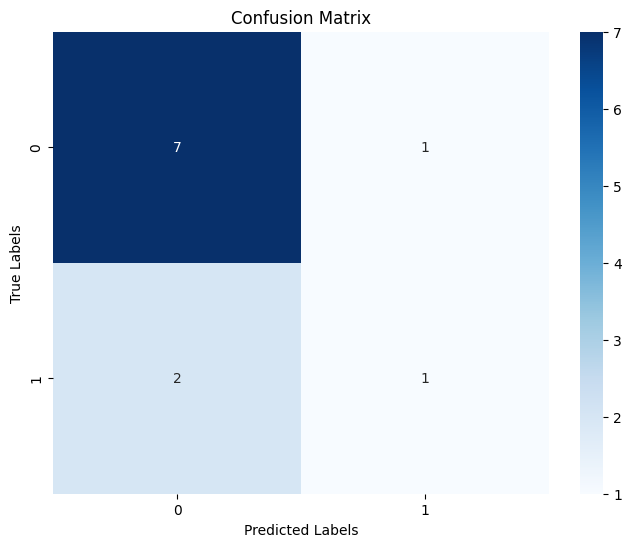

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

Confusion Matrix:
[[7 1]
 [2 1]]


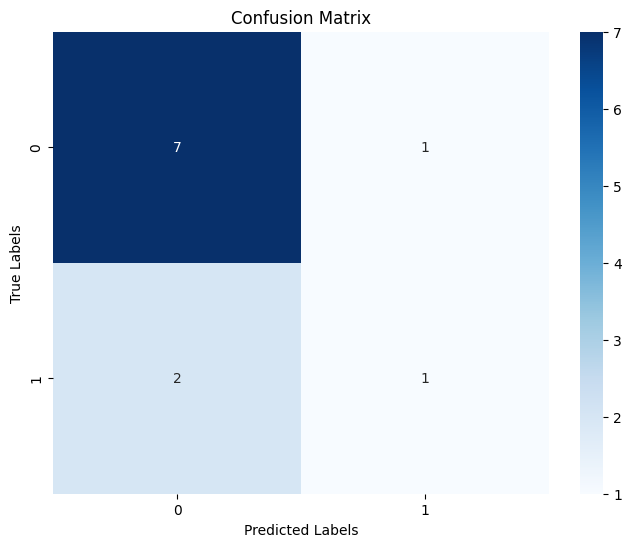

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

Confusion Matrix:
[[7 1]
 [2 1]]


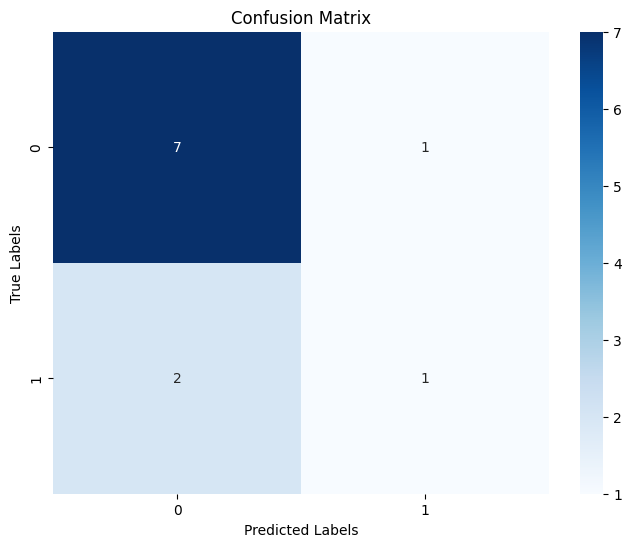

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

Confusion Matrix:
[[5 3]
 [2 1]]


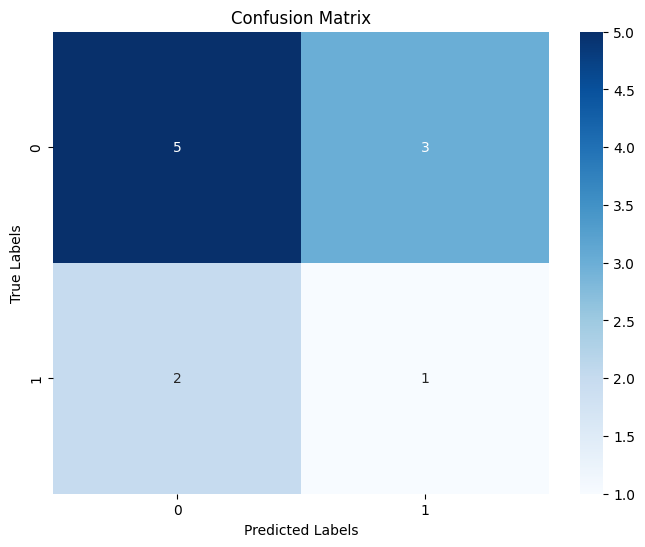

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` par

Confusion Matrix:
[[5 3]
 [2 1]]


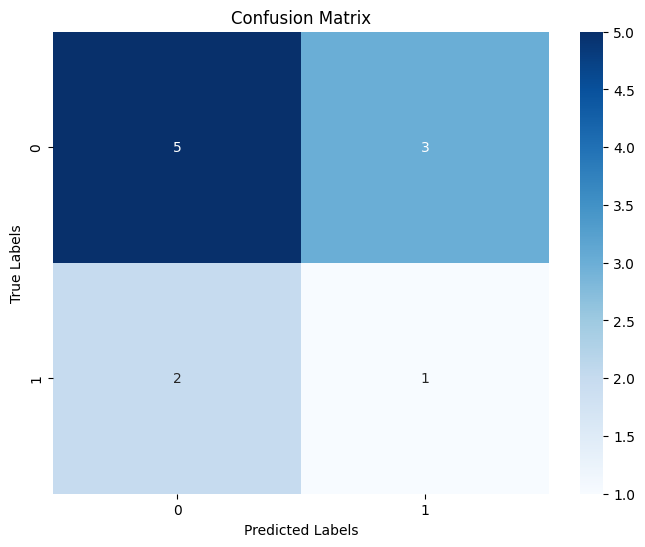

Model: Logistic Regression
Best Parameters: {'C': 1}
CV Accuracy: 0.5944444444444444
CV Precision: 0.49976190476190474
CV Recall: 0.5083333333333334
CV F1-Score: 0.47668997668997665

Model: Decision Tree
Best Parameters: {'max_depth': 5}
CV Accuracy: 0.5083333333333333
CV Precision: 0.3716666666666667
CV Recall: 0.43
CV F1-Score: 0.3925541125541126

Model: Random Forest
Best Parameters: {'n_estimators': 300}
CV Accuracy: 0.525
CV Precision: 0.3410714285714286
CV Recall: 0.4255555555555556
CV F1-Score: 0.37237207237207237

Model: SVM
Best Parameters: {'C': 1, 'kernel': 'linear'}
CV Accuracy: 0.638888888888889
CV Precision: 0.5769047619047619
CV Recall: 0.5533333333333333
CV F1-Score: 0.5368181818181819

Model: KNN
Best Parameters: {'n_neighbors': 7}
CV Accuracy: 0.5472222222222223
CV Precision: 0.4357142857142858
CV Recall: 0.48111111111111116
CV F1-Score: 0.43923927923927925

Best Model: SVM
Test Accuracy: 0.5454545454545454
Test Precision: 0.48214285714285715
Test Recall: 0.4791666666

In [ ]:


def evaluate_classification_models(X, y, models, param_grid, scoring):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

    # Perform grid search and cross-validation for each model
    results = {}
    for name, model in models:
        grid_search = GridSearchCV(model, param_grid[name], scoring=scoring, refit='Accuracy', cv=5)
        grid_search.fit(X_train, y_train)

        # Cross-validation scores for all parameter combinations
        cv_results = cross_validate(grid_search.best_estimator_, X_train, y_train, scoring=scoring, cv=5, return_train_score=False)

        results[name] = {
            'best_params': grid_search.best_params_,
            'best_estimator': grid_search.best_estimator_,
            'cv_Accuracy': cv_results['test_Accuracy'].mean(),
            'cv_Precision': cv_results['test_Precision'].mean(),
            'cv_Recall': cv_results['test_Recall'].mean(),
            'cv_F1-Score': cv_results['test_F1-Score'].mean()
        }



        # ...

        # Train the best model on the entire training dataset
        best_model = max(results, key=lambda x: results[x]['cv_Accuracy'])
        final_model = results[best_model]['best_estimator']
        final_model.fit(X_train, y_train)

        # Evaluate the performance of the best model on the test set
        y_pred = final_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Calculate the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Print the confusion matrix
        print("Confusion Matrix:")
        print(cm)

        # Visualize the confusion matrix using a heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.title("Confusion Matrix")
        plt.show()

    return results, best_model, accuracy, precision, recall, f1

# Define the models, param_grid, and scoring
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier())
]

param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'KNN': {'n_neighbors': [3, 5, 7]}
}

scoring = {
    'Accuracy': 'accuracy',
    'Precision': 'precision_macro',
    'Recall': 'recall_macro',
    'F1-Score': 'f1_macro'
}

# Call the function and get the results
results, best_model, accuracy, precision, recall, f1 = evaluate_classification_models(df.iloc[:, :-1], df.iloc[:, -1], models, param_grid, scoring)

# Print the results
for name, result in results.items():
    print("Model:", name)
    print("Best Parameters:", result['best_params'])
    print("CV Accuracy:", result['cv_Accuracy'])
    print("CV Precision:", result['cv_Precision'])
    print("CV Recall:", result['cv_Recall'])
    print("CV F1-Score:", result['cv_F1-Score'])
    print()

print("Best Model:", best_model)
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-Score:", f1)
